## NumPy, Pandas & Matplotlib Integration

1. Data Import and Cleaning:

Import the dataset using Pandas.

Identify missing values and handle them appropriately.

Use NumPy to convert relevant columns to numerical types if necessary.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns

In [4]:
df = pd.read_csv(r'/content/global_power_plant_database.csv')
df.head()

<ipython-input-4-0f8ea5a040aa>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [6]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

2. Exploratory Data Analysis:

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

In [8]:
# Summarize key statistics for numerical columns
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [12]:
# Explore the distribution of power plants by country
power_plants_by_country = df['country'].value_counts()

print(power_plants_by_country)

USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
       ... 
LSO       1
ESH       1
SUR       1
PSE       1
GNB       1
Name: country, Length: 167, dtype: int64


In [13]:
# Explore the distribution of power plants by fuel type
power_plants_by_fuel_type = df['primary_fuel'].value_counts()

print(power_plants_by_fuel_type)

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64


3. Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.

Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [21]:
# Descriptive statistics by fuel type
fuel_types = df['primary_fuel'].unique()
for fuel_type in fuel_types:
    subset = df[df['primary_fuel'] == fuel_type]['capacity_mw']
    print(f"\nFuel type is {fuel_type}:")
    print("Mean:", np.mean(subset))


Fuel type is Hydro:
Mean: 147.17155111794298

Fuel type is Solar:
Mean: 17.657039239568682

Fuel type is Gas:
Mean: 373.4493752248624

Fuel type is Other:
Mean: 84.02000000000001

Fuel type is Oil:
Mean: 112.87875414568967

Fuel type is Wind:
Mean: 49.224126029191616

Fuel type is Nuclear:
Mean: 2091.8551794871796

Fuel type is Coal:
Mean: 843.5798281545066

Fuel type is Waste:
Mean: 13.809657303370786

Fuel type is Biomass:
Mean: 23.97293818181818

Fuel type is Wave and Tidal:
Mean: 55.220000000000006

Fuel type is Petcoke:
Mean: 202.048125

Fuel type is Geothermal:
Mean: 67.13095238095238

Fuel type is Storage:
Mean: 12.683703703703703

Fuel type is Cogeneration:
Mean: 98.73170731707319


In [24]:
# Null hypothesis: The means of power output for different fuel types are the same
# Alternative hypothesis: At least one fuel type has a different mean power output

fuel_type_groups = [df[df['primary_fuel'] == fuel_type]['capacity_mw'] for fuel_type in fuel_types]

# Hypothesis testing
f_statistic, p_value = f_oneway(*fuel_type_groups)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 967.4600353089305
P-Value: 0.0


In [25]:
# Check significance level
alpha = 0.05
if p_value < alpha:
    print("\nThe means of power output for different fuel types are significantly different.")
else:
    print("\nThe means of power output for different fuel types are not significantly different.")


The means of power output for different fuel types are significantly different.


4. Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.

Explore how the mix of fuel types for power generation has evolved over the years.

In [32]:
# Group the data by year and fuel type
fuel_counts = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

# Calculate the percentage of each fuel type over time
fuel_percentage = fuel_counts.div(fuel_counts.sum(axis=1), axis=0) * 100

<Figure size 1200x600 with 0 Axes>

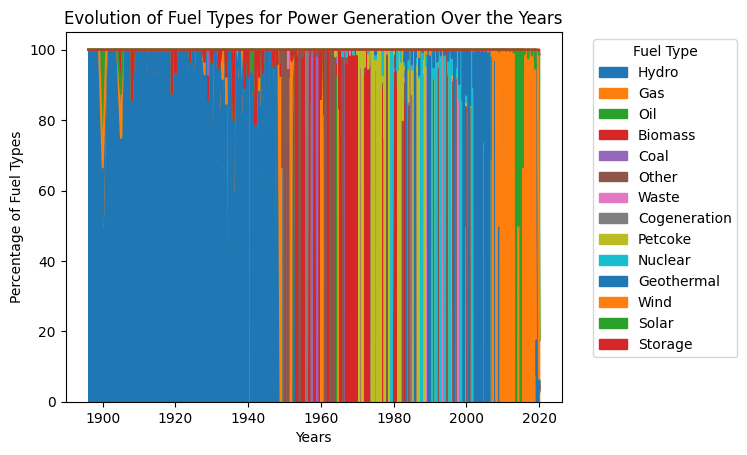

In [34]:
# Plot the trends
plt.figure(figsize=(12, 6))
fuel_percentage.plot(kind='area', stacked=True)
plt.title('Evolution of Fuel Types for Power Generation Over the Years')
plt.xlabel('Years')
plt.ylabel('Percentage of Fuel Types')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5. Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.

Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

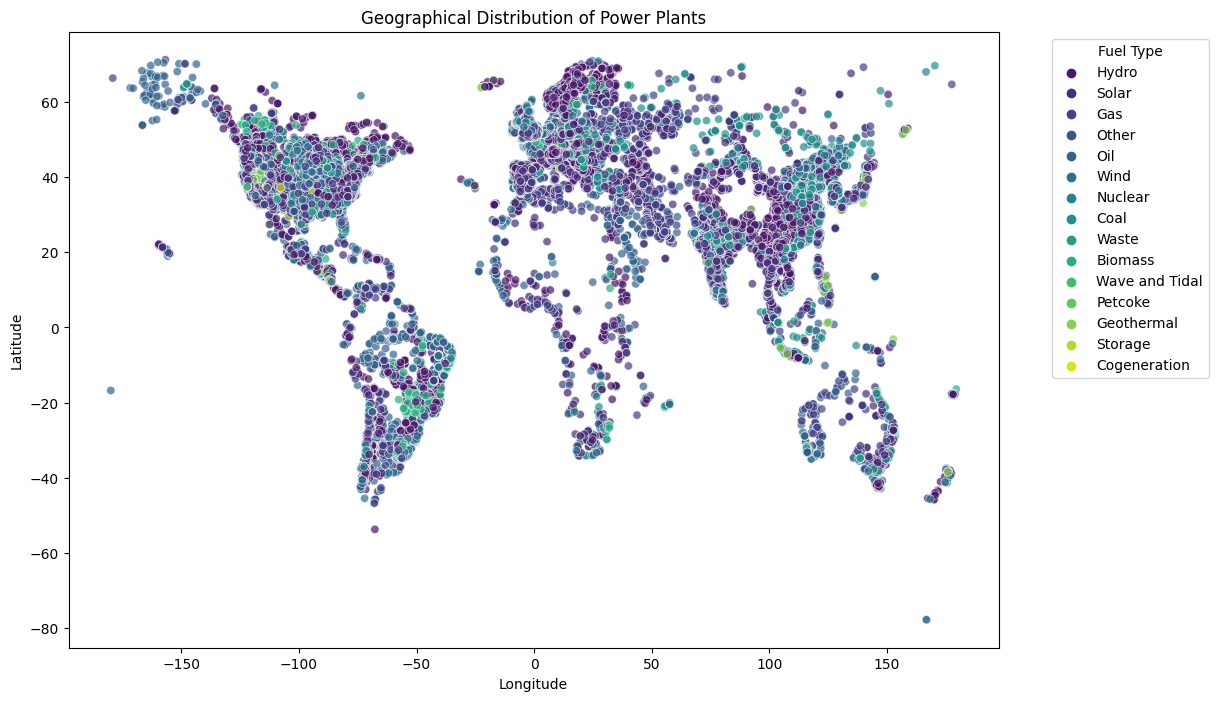

In [37]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='primary_fuel', palette='viridis', alpha=0.7)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

6. Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).

Discuss the relevance of eigenvectors and eigenvalues in this context.

Eigenvalues:
[1.17147434 0.9901188  0.83840686]

Eigenvectors:
[[-0.63986801  0.40776072  0.65138323]
 [ 0.32661662  0.91155372 -0.24978272]
 [-0.69562239  0.05292462 -0.7164555 ]]


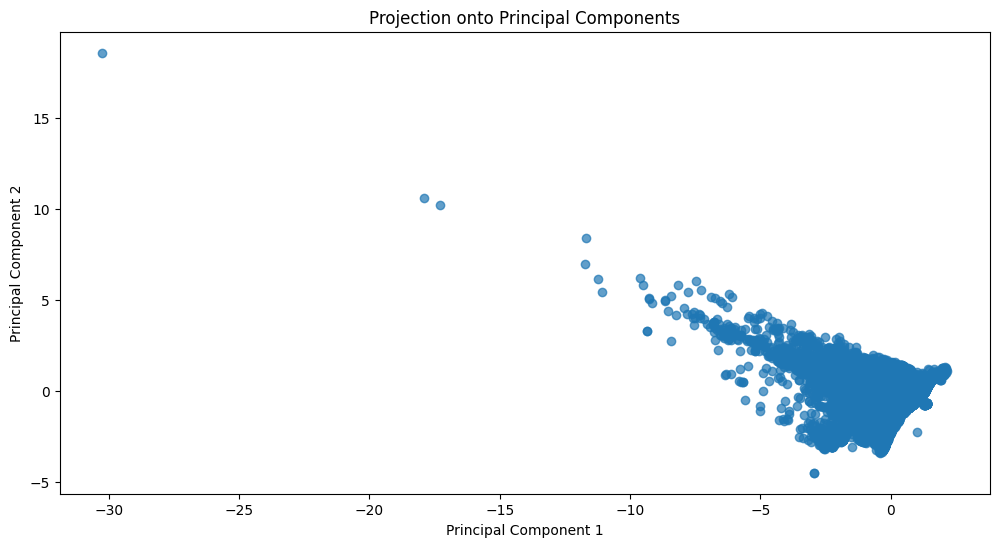

In [46]:
# Extract relevant columns
subset_df = df[['capacity_mw', 'latitude', 'longitude']]

# Standardize the data for analysis
standardized_data = (subset_df - subset_df.mean()) / subset_df.std()

# Create a covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvectors based on eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display the results
print("Eigenvalues:")
print(sorted_eigenvalues)
print("\nEigenvectors:")
print(sorted_eigenvectors)

# Project the data onto the principal components
principal_components = standardized_data.dot(sorted_eigenvectors)

plt.figure(figsize=(12, 6))
plt.scatter(principal_components.iloc[:, 0], principal_components.iloc[:, 1], alpha=0.7)
plt.title('Projection onto Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


By analyzing the eigenvectors, we can understand which attributes contribute the most to the principal components, helping identify relationships and patterns in the data. The scatter plot of the principal components can provide insights into the overall structure and relationships between the selected attributes.


---



---



---



7. Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.

Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.


In [48]:
# Create a NumPy array for complex filtering
filtered_data = df[(df['capacity_mw'] > 100) & (df['primary_fuel'] == 'Gas')]

filtered_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
19,DZA,Algeria,Ain Djasser,WRI1023776,520.0,35.8665,6.0262,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2171.28,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
27,DZA,Algeria,Arbaa,WRI1023777,560.0,36.5988,3.1375,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,2338.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
30,DZA,Algeria,Boufarik 2,WRI1023793,450.0,36.5960,2.8780,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,1878.99,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
31,DZA,Algeria,Boutelilis,WRI1023781,450.0,35.5658,-0.9386,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,1878.99,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34,DZA,Algeria,F'Krina,WRI1023785,292.0,35.7666,7.3619,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,1219.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


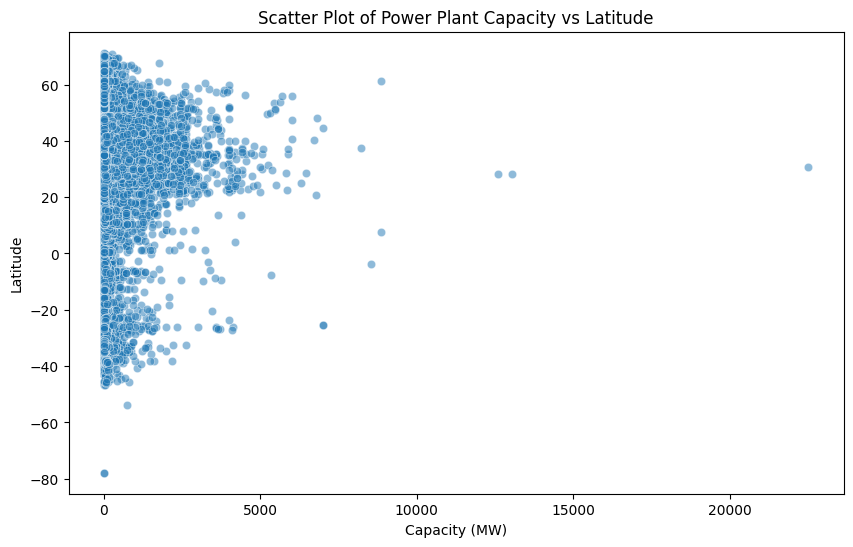

In [49]:
x_values = df['capacity_mw'].values
y_values = df['latitude'].values

# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5, edgecolors="w", linewidth=0.5)
plt.title('Scatter Plot of Power Plant Capacity vs Latitude')
plt.xlabel('Capacity (MW)')
plt.ylabel('Latitude')
plt.show()